In [1]:
%load_ext autoreload
%autoreload 2

import yaml
from IPython.core.display import HTML
from IPython.display import display
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt

from oml.models.siamese import ConcatSiamese
from oml.models.vit.vit import ViTExtractor
from oml.const import MOCK_DATASET_PATH
from oml.transforms.images.torchvision.transforms import get_normalisation_resize_hypvit
from oml.utils.images.images import imread_cv2

display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_rows', 330)

%matplotlib inline


In [2]:
extractor = ViTExtractor(arch="vits16", normalise_features=False, weights=None)
siamese = ConcatSiamese(extractor=extractor,
              mlp_hidden_dims=[384, 192],
              weights=None
             )

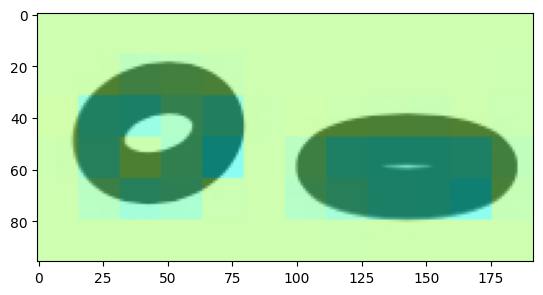

In [3]:
im1 = imread_cv2(MOCK_DATASET_PATH / 'images' / "circle_1.jpg")
im2 = imread_cv2(MOCK_DATASET_PATH / 'images' / "circle_2.jpg")

im = np.concatenate([im1, im2], axis=1)

attn = extractor.draw_attention(im);
plt.imshow(attn)
plt.show()
